In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime
import matplotlib.dates as mdates
from ast import literal_eval
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [3]:
df = pd.read_csv('data.csv')

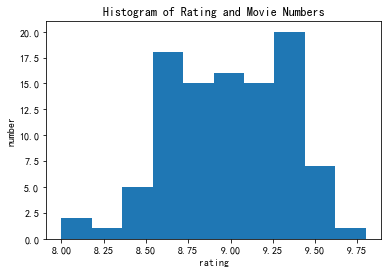

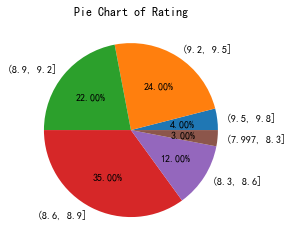

In [198]:
# Rating
rating = pd.to_numeric(df.rating)
rating_count_intervals = rating.value_counts(sort=False,bins=6).sort_index(ascending=False)

plt.hist(rating)
plt.title('Histogram of Rating and Movie Numbers')
plt.xlabel("rating")
plt.ylabel("number")
plt.savefig("Histogram of Rating and Movie Numbers.jpg",dpi=300)
plt.show()


plt.pie(rating_count_intervals,labels=rating_count_intervals.index,autopct='%.2f%%')
plt.title('Pie Chart of Rating')
plt.savefig("Pie Chart of Rating.jpg",dpi=300)
plt.show()

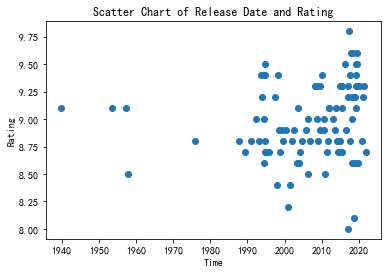

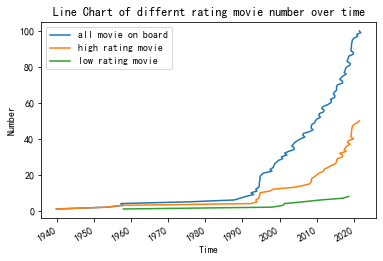

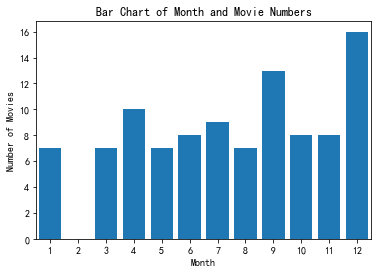

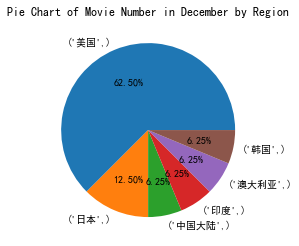

In [182]:
#Time
mtime = pd.to_datetime(df.time.str[0:10])

plt.xlabel('Time')
plt.ylabel('Rating')
plt.scatter(mtime,df['rating'])
plt.title("Scatter Chart of Release Date and Rating")
plt.savefig("Scatter Chart of Release Date and Rating.jpg",dpi=300)
plt.show()

x1 = [datetime.strptime(i, '%Y/%m/%d').date() for i in df.sort_values(by='time')['time']]
y1 = list(range(1,101,1))
plt.plot(x1,y1,label='all movie on board')

high_rating = df[df['rating']>=9.0]
pd.to_datetime(high_rating.time.str[0:10])
x_high = high_rating.sort_values(by='time')['time']
x2 = [datetime.strptime(i, '%Y/%m/%d').date() for i in x_high]
y2 = list(range(1,high_rating.shape[0]+1))
plt.plot(x2,y2,label='high rating movie')

low_rating = df[df['rating']<8.6]
pd.to_datetime(low_rating.time.str[0:10])
x_low = low_rating.sort_values(by='time')['time']
x3 = [datetime.strptime(i, '%Y/%m/%d').date() for i in x_low]
y3 = list(range(1,low_rating.shape[0]+1))
plt.plot(x3,y3,label='low rating movie')

plt.xlabel('Time')
plt.ylabel('Number')
plt.title("Line Chart of differnt rating movie number over time")
plt.legend()
plt.gcf().autofmt_xdate()
plt.savefig("Line Chart of differnt rating movie number over time.jpg",dpi=300)
plt.show()


month = [datetime.strptime(i, '%Y/%m/%d').date().month for i in df['time']]
sort_month = pd.value_counts(month).sort_index(ascending=True)
plt.bar(sort_month.index,sort_month.values)
x_major_locator=plt.MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.5,12.5)
plt.title('Bar Chart of Month and Movie Numbers')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.savefig("Bar Chart of Month and Movie Number.jpg",dpi=300)
plt.show()

Dec = []
for i in range(1,len(df.index),1):
    if datetime.strptime(df['time'][i], '%Y/%m/%d').date().month == 12:
        Dec.append(i)
region_Dec = df.loc[Dec][["region"]].value_counts()
plt.pie(region_Dec,labels=region_Dec.index,autopct='%.2f%%')
plt.title('Pie Chart of Movie Number in December by Region')
plt.savefig("Pie Chart of Movie Number in December by Region.jpg",dpi=300)
plt.show()

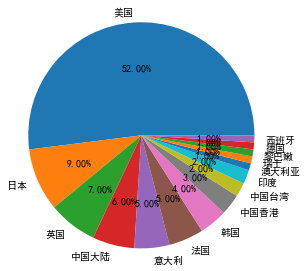

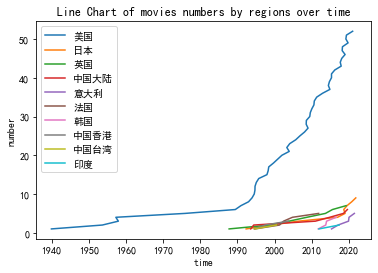

In [188]:
#Region
region_count = df['region'].value_counts()
plt.pie(region_count,labels=region_count.index,autopct='%.2f%%',radius = 1.3)
plt.savefig("Pie Chart of movies by region.jpg",dpi=300)
plt.show()

for i in region_count.index[:-5]:
    region = df[df['region']==i]
    x = [datetime.strptime(i, '%Y/%m/%d').date() for i in region.sort_values(by='time')['time']]
    y = list(range(1,region.shape[0]+1,1))
    plt.plot(x,y,label=i)
plt.legend(loc='upper left')
plt.xlabel('time')
plt.ylabel('number')
plt.title('Line Chart of movies numbers by regions over time')
plt.savefig("Line Chart of movies numbers by regions over time.jpg",dpi=300)
plt.show()

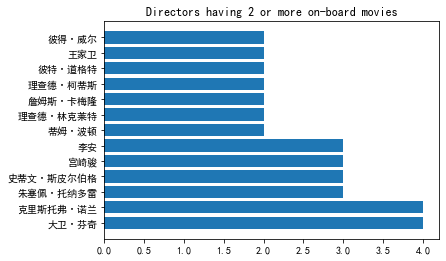

In [201]:
#director
director=[]
for i in df['director']:
    dl = literal_eval(i)
    for d in dl:
        director.append(d)
director_count = pd.value_counts(director)
good_director = director_count[:len([i for i in director_count if i > 1])]
plt.barh(good_director.index,good_director.values)
plt.title('Directors having 2 or more on-board movies')
plt.xlabel('')
plt.savefig("Directors having 2 or more on-board movies.jpg",dpi=200,bbox_inches = 'tight')
plt.show()

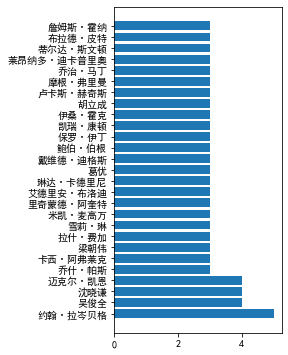

In [101]:
#actor
actor=[]
for i in df['actor']:
    al = literal_eval(i)
    for a in al:
        actor.append(a)
actor_count = pd.value_counts(actor)
good_actor = actor_count[:len([i for i in actor_count if i > 2])]
fig = plt.figure(figsize=(3,6))
plt.barh(good_actor.index,good_actor.values)
plt.show()

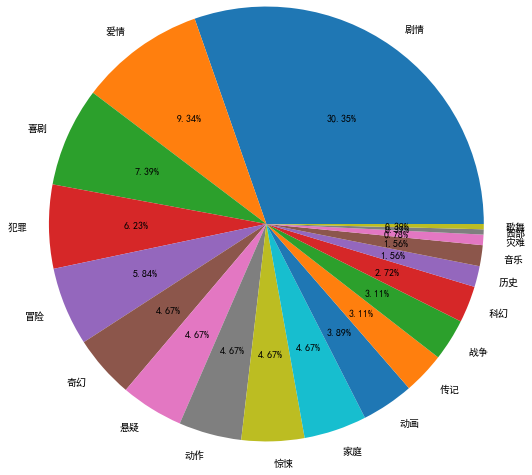

In [206]:
#type
mtype=[]
for i in df['type']:
    tl = literal_eval(i)
    for t in tl:
        mtype.append(t)
type_count = pd.value_counts(mtype)
plt.pie(type_count,labels=type_count.index,autopct='%.2f%%',radius = 2.5)
plt.savefig("Pie chart of the movie types",dpi=300,bbox_inches = 'tight')
plt.show()

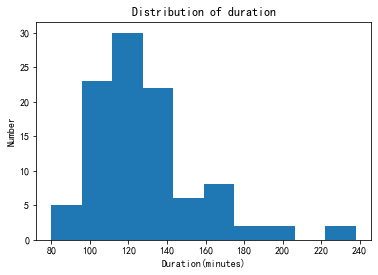

In [197]:
# duration
duration = pd.to_numeric(df['duration'])
plt.hist(duration)
plt.title("Distribution of duration")
plt.ylabel('Number')
plt.xlabel('Duration(minutes)')
plt.savefig("Distribution of duration",dpi=300)
plt.show()

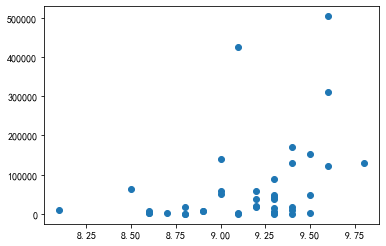

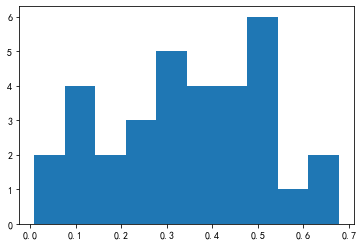

In [135]:
#culmulative income
income_movie = df.dropna(axis=0,subset=['all culmulative income'])
plt.scatter(income_movie['rating'],income_movie['all culmulative income'])
plt.show()

income_week_movie = df.dropna(axis=0,subset=['1 week culmulative income'])
rate = [income_week_movie['1 week culmulative income']/income_week_movie['all culmulative income']]
plt.hist(rate)
plt.show()